# Nama anggota

Agung Hadi Winoto 1305213027 \
Dely Rafael S. 1305210086 \
Firgy Matannatikka 1305210097

In [ ]:
file_path = "/content/old_cars.csv"

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(file_path)

Data terdiri dari

1. Jumlah Silinder
2. Volume Mesin
3. Berat Kendaraan
4. Tahun
5. Asal Geografis
6. Tenaga Kuda
7. Efisiensi Bahan Bakar

Petunjuk

Rata-rata Bensin (MPG)



In [ ]:
df

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US
3,AMC Concord,19.4,232.0,90,3210,78,US
4,AMC Concord,24.3,151.0,90,3003,80,US
...,...,...,...,...,...,...,...
393,Volvo 145e (sw),18.0,121.0,112,2933,72,Europe
394,Volvo 244DL,22.0,121.0,98,2945,75,Europe
395,Volvo 245,20.0,130.0,102,3150,76,Europe
396,Volvo 264gl,17.0,163.0,125,3140,78,Europe


In [ ]:
df.head()

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US
3,AMC Concord,19.4,232.0,90,3210,78,US
4,AMC Concord,24.3,151.0,90,3003,80,US


In [ ]:
df.shape

(398, 7)

In [ ]:
df.columns

Index(['Car', 'MPG', 'Displacement', 'Horsepower', 'Weight', 'Model',
       'Origin'],
      dtype='object')

In [ ]:
df.dtypes

Car              object
MPG             float64
Displacement    float64
Horsepower        int64
Weight            int64
Model             int64
Origin           object
dtype: object

In [ ]:
df.isnull().sum()

Car             0
MPG             0
Displacement    0
Horsepower      0
Weight          0
Model           0
Origin          0
dtype: int64

<h3> Data Tidak Kosong </h3>

In [ ]:
df.describe()

,MPG,Displacement,Horsepower,Weight,Model
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,102.894472,2970.424623,76.010050
std,7.815984,104.269838,40.269544,846.841774,3.697627
min,9.000000,68.000000,0.000000,1613.000000,70.000000
25%,17.500000,104.250000,75.000000,2223.750000,73.000000
50%,23.000000,148.500000,92.000000,2803.500000,76.000000
75%,29.000000,262.000000,125.000000,3608.000000,79.000000
max,46.600000,455.000000,230.000000,5140.000000,82.000000


#Task 1: Grouped Bar Chart

Buatlah visualisasi dengan menggunakan bar chart berkelompok, seperti contoh di atas, terkait
distribusi rata-rata bensin (MPG) dari semua model berdasarkan asal geografis. Dengan kata lain,
anda diminta untuk membuat grafik di mana setiap nilai rata-rata bensin (MPG) dihubungkan dengan
3 bar chart (satu untuk masing-masing asal: AS, Eropa, Jepang) dan menunjukkan bagaimana
distribusi nilai rata-rata bensin dibandingkan antar wilayah. Untuk itu, anda harus membagi rentang
nilai rata-rata bensin yang mungkin dengan kenaikan 2 mpg

In [ ]:
df[["MPG", "Origin"]]

,MPG,Origin
0,13.0,US
1,15.0,US
2,17.0,US
3,19.4,US
4,24.3,US
...,...,...
393,18.0,Europe
394,22.0,Europe
395,20.0,Europe
396,17.0,Europe


In [ ]:
#check unique Origin
df["Origin"].unique()

array(['US', 'Europe', 'Japan'], dtype=object)

Membagi rentang nilai rata-rata bensin yang mungkin dengan kenaikan 2 mpg

<h2>Cek Data Melalui Tabel Menghitung Jumlah masing masing bins (rentang kenaikan 2 mpg)</h2>

In [ ]:
# Create a list of possible mean MPG values
mpg_means = list(range(int(df['MPG'].min()), int(df['MPG'].max()), 2))

# Create a new column in the original DataFrame with the category labels
df['MPG Category'] = pd.cut(df['MPG'], bins=mpg_means, labels=mpg_means[:-1])

# Group the data by origin and MPG category, and count the number of cars in each group
grouped_df = df.groupby(['Origin', 'MPG Category']).size().reset_index(name='Count')

# Pivot the data to create a table with origin as rows, MPG categories as columns, and count as values
pivot_df = grouped_df.pivot(index='Origin', columns='MPG Category', values='Count')

# Display the resulting table
print(pivot_df)

MPG Category  9  11  13  15  17  19  21  23  25  27  29  31  33  35  37  39  \
Origin                                                                        
Europe        0   0   0   3   3   4   7   9  11   9   8   3   3   3   1   1   
Japan         0   0   0   0   3   2   5   9   6   5   7  18   7   7   5   3   
US            6  26  36  27  38  30  16  15  17  13   8   2   7   4   3   0   

MPG Category  41  43  
Origin                
Europe         1   4  
Japan          0   1  
US             0   0  


In [ ]:
#check unique Origin
df["Origin"].unique()

array(['US', 'Europe', 'Japan'], dtype=object)

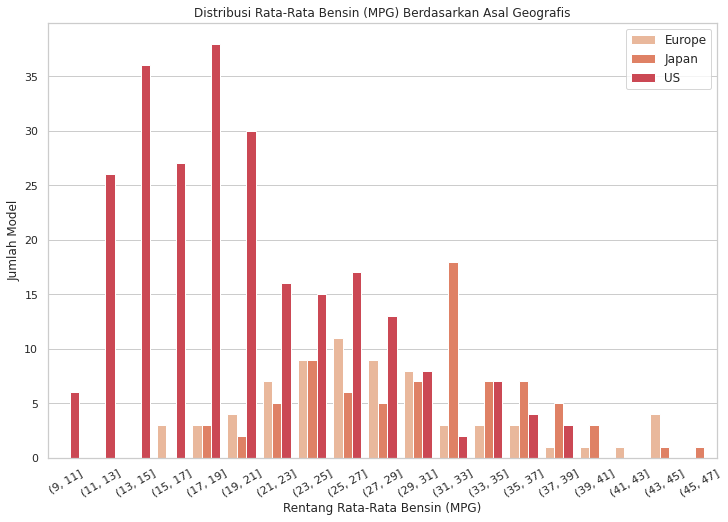

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# membagi rentang nilai rata-rata bensin dengan kenaikan 2 mpg
bins = range(9, 49, 2)

# membuat kolom baru dengan nilai rentang rata-rata bensin
df["MPG Range"] = pd.cut(df["MPG"], bins)

# menghitung jumlah model dalam setiap rentang nilai dan untuk setiap asal geografis
count_by_range = df.groupby(["MPG Range", "Origin"]).size().reset_index(name="count")

plt.figure(figsize=(12,8))

# heatmap color
heatmap_palette = sns.color_palette("rocket_r")

# membuat grafik bar chart dengan Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(data=count_by_range, x="MPG Range", y="count", hue="Origin",palette=heatmap_palette)

# menambahkan judul dan label pada grafik
ax.set_title("Distribusi Rata-Rata Bensin (MPG) Berdasarkan Asal Geografis")
ax.set_xlabel("Rentang Rata-Rata Bensin (MPG)")
ax.set_ylabel("Jumlah Model")

# memutar label sumbu x menjadi horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='center')

# menampilkan legend di samping kanan dan memperbesar ukuran legend
ax.legend(loc='upper right', prop={'size': 12})

# menampilkan grafik
plt.show()

#Task 2: Line Chart

Gambarkan evolusi temporal dari efisiensi bahan bakar (MPG) untuk setiap asal geografis dari tahun
1970 hingga 1982 menggunakan line chart. Setiap titik menunjukkanrata-rata tahunan dari efisiensi
bahan bakar untuk asal yang diberikan dan setiap kurva akan terdiri dari 13 titik. Berikan warna yang
berbeda untuk setiap kurva

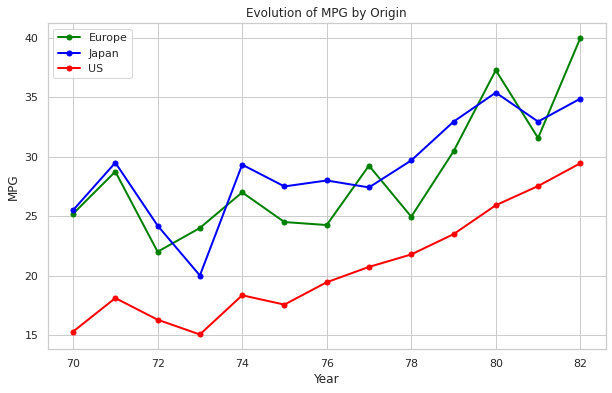

In [ ]:
# Add a year column based on the model name
df['Year'] = df['Model'].astype(str).str[:3].astype(int)

# Group by origin and year
grouped = df.groupby(["Origin", "Year"]).mean().reset_index()

# Create a dictionary of colors for each origin
colors_dict = {
    "US": "red",
    "Europe": "green",
    "Japan": "blue"
}

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each group's data as a line with different colors
for name, group in grouped.groupby("Origin"):
    x = group["Year"]
    y = group["MPG"]
    ax.plot(x, y, label=name, color=colors_dict[name], linewidth=2, marker='o', markersize=5 )

# Set axis labels and title
ax.set_xlabel("Year")
ax.set_ylabel("MPG")
ax.set_title("Evolution of MPG by Origin")

# Add legend
ax.legend(loc="best")

# Show the plot
plt.show()

#Task 3: Scatter Plot


Sejauh ini, kita hanya memvisualisasikan satu atribut saja (yaitu konsumsi bahan bakar). Untuk tugas
ketiga ini, visualisasikan hubungan antara tenaga kuda dan konsumsi bahan bakar menggunakan
scatter plot. Sumbu horizontal merepresentasikan tenaga kuda (Horsepower) dan sumbu vertikal
merepresentasikan konsumsi bahan bakar (MPG), dan setiap titik data merepresentasikan mobil
tertentu. Terapkan pewarnaan kode warna pada diagram titik-titik untuk menunjukkan tahunnya.

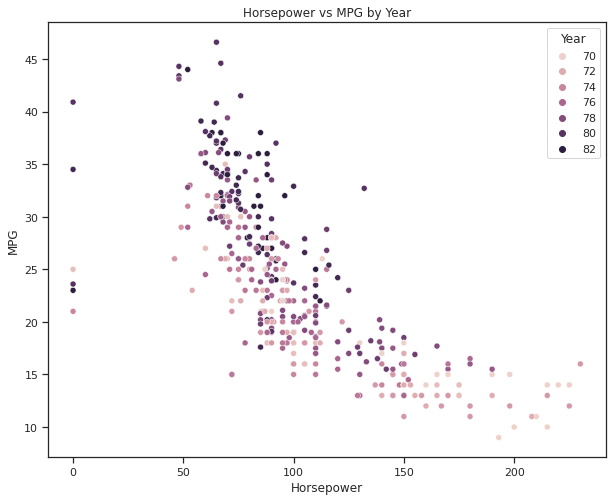

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create scatter plot with color-coded points by year
sns.scatterplot(x='Horsepower', y='MPG', hue='Year', data=df)

# Add axis labels and title
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG by Year')

# Show plot
plt.show()

#Task 4: Scatter Plot Matrix

Visualisasikan tingkat efisiensi bahan bakar (MPG), berat kendaraan (Weight), daya kuda
(Horsepower), dan ukuran mesin (Weight) dalam scatter plot matrix. Berikan kode warna pada titiktitik data masing-masing berdasarkan negara asalnya.

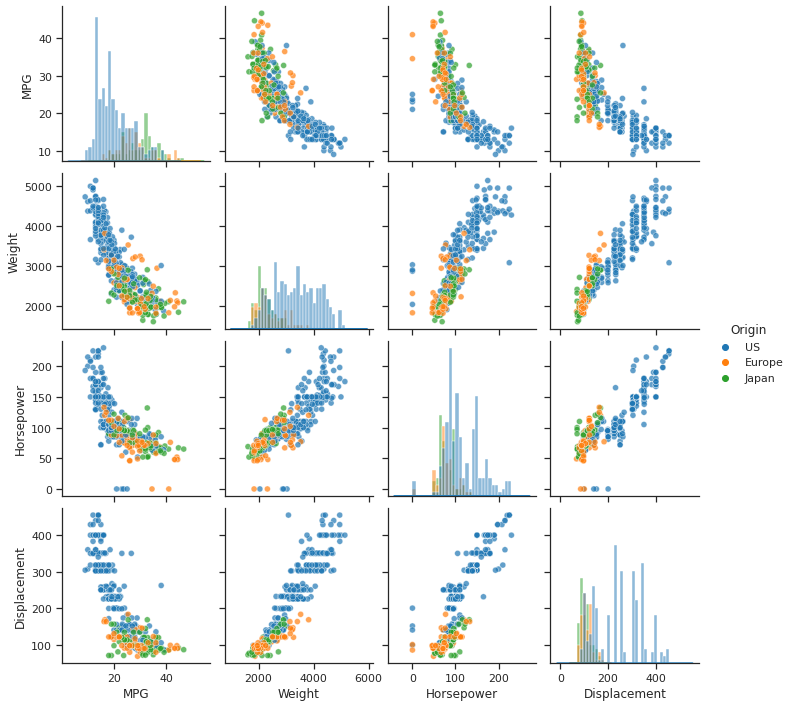

In [ ]:
# Set style
sns.set(style="ticks")

# Create a pairplot with hue based on Origin
g = sns.pairplot(data=df[['MPG',"Weight", "Horsepower", "Displacement", "Origin"]], hue="Origin",
                 diag_kind="hist", diag_kws={'alpha': 0.5, 'color': 'blue', 'bins': 30},
                 plot_kws={'alpha': 0.7}, palette="tab10")

# Customize the diagonal plots
g.map_diag(sns.kdeplot, lw=2, color='black')

# Show the plot
plt.show()